https://github.com/speechbrain/speechbrain/tree/develop/recipes/VoxCeleb/SpeakerRec#speaker-verification-using-ecapa-tdnn-embeddings

In [50]:
import os
import time
from speechbrain.inference.speaker import SpeakerRecognition
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf


In [41]:
input_model_dir = "../../../data/pretrained_models/"
models_to_test = ["spkrec-ecapa-voxceleb", "spkrec-xvect-voxceleb", "spkrec-resnet-voxceleb"]

people_folder = "../../../data/stored/people/"
base_people_audios = {
    "eliot_christon"  : "eliot_christon/voices/out_1_eliot0.wav",
    "thomas_oxisoglou": "thomas_oxisoglou/voices/out_2_thomas1.wav",
    "roberto_caurand" : "roberto_caurand/voices/roberto_caurand_short.mp3",
}

audios_to_verify_folder = "audios_to_test/"
audios_to_verify = [f for f in os.listdir(audios_to_verify_folder) if f.endswith('.wav')]

In [2]:
results = pd.DataFrame(columns=["model", "audio_to_verify", "audio_reference", "person", "result", "probability", "time"])


for model_name in models_to_test:
    print(f"\n===================================\n### MODEL {model_name.upper()}\n")

    speaker_recognition = SpeakerRecognition.from_hparams(source=f"speechbrain/{model_name}", savedir=input_model_dir + model_name)

    for audio_to_verify in audios_to_verify:
        print(f"\nAUDIO TO VERIFY: {audio_to_verify}")
        audio_to_verify_path = os.path.join(audios_to_verify_folder, audio_to_verify)

        for name, audio_reference in base_people_audios.items():
            print(f" - REFERENCE AUDIO: {audio_reference}")
            audio_ref_path = os.path.join(people_folder, audio_reference)
            
            # Speaker verification
            start = time.time()
            proba, result = speaker_recognition.verify_files(audio_to_verify_path, audio_ref_path)
            end = time.time()
            print(f"    * Speaker verification result: {result.item()} ({proba.item()})")
            print(f"    * Time: {end - start}")

            results = pd.concat([results, pd.DataFrame([[model_name, audio_to_verify, audio_reference, name, result, proba, end - start]], columns=results.columns)])

results.to_csv("results.csv", index=False)


### MODEL SPKREC-ECAPA-VOXCELEB


AUDIO TO VERIFY: gev_eliot0.wav
 - REFERENCE AUDIO: eliot_christon/voices/out_1_eliot0.wav
    * Speaker verification result: True (0.9336423873901367)
    * Time: 0.5184805393218994
 - REFERENCE AUDIO: thomas_oxisoglou/voices/out_2_thomas1.wav


C:\Users\echriston\AppData\Local\Temp\ipykernel_13980\2827919150.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([[model_name, audio_to_verify, audio_reference, name, result, proba, end - start]], columns=results.columns)])


    * Speaker verification result: False (0.11393866688013077)
    * Time: 0.3114893436431885
 - REFERENCE AUDIO: roberto_caurand/voices/roberto_caurand_short.mp3
    * Speaker verification result: False (0.033966995775699615)
    * Time: 0.5043668746948242

AUDIO TO VERIFY: out_0_2024-02-23_17-25-01.wav
 - REFERENCE AUDIO: eliot_christon/voices/out_1_eliot0.wav
    * Speaker verification result: True (0.7524908185005188)
    * Time: 0.3613288402557373
 - REFERENCE AUDIO: thomas_oxisoglou/voices/out_2_thomas1.wav
    * Speaker verification result: True (0.27876484394073486)
    * Time: 0.3498222827911377
 - REFERENCE AUDIO: roberto_caurand/voices/roberto_caurand_short.mp3
    * Speaker verification result: False (0.1520918607711792)
    * Time: 0.5156674385070801

AUDIO TO VERIFY: out_0_2024-03-20_15-58-14.wav
 - REFERENCE AUDIO: eliot_christon/voices/out_1_eliot0.wav
    * Speaker verification result: False (-0.009129201993346214)
    * Time: 0.23675179481506348
 - REFERENCE AUDIO: th

In [51]:
# build a df of audio durations
audio_durations = pd.DataFrame(columns=["audio", "duration"])

def get_audio_duration(filepath):
    print(f" - AUDIO: {filepath}")
    sf_info = sf.info(filepath)
    frames = sf_info.frames
    rate = sf_info.samplerate    
    return frames / float(rate)
    
for audio in audios_to_verify + list(base_people_audios.values()):
    audio_path = os.path.join(people_folder, audio) if audio in base_people_audios.values() else os.path.join(audios_to_verify_folder, audio)
    audio_duration = get_audio_duration(audio_path)
    audio_durations = pd.concat([audio_durations, pd.DataFrame([[audio, audio_duration]], columns=audio_durations.columns)])

audio_durations.to_csv("audio_durations.csv", index=False)

 - AUDIO: audios_to_test/gev_eliot0.wav
 - AUDIO: audios_to_test/out_0_2024-02-23_17-25-01.wav
 - AUDIO: audios_to_test/out_0_2024-03-20_15-58-14.wav
 - AUDIO: audios_to_test/out_0_2024-03-20_16-00-17.wav
 - AUDIO: audios_to_test/out_0_last.wav
 - AUDIO: audios_to_test/out_0_thomas0.wav
 - AUDIO: audios_to_test/out_0_thomas1.wav
 - AUDIO: audios_to_test/out_1_2024-02-23_17-25-01.wav
 - AUDIO: audios_to_test/out_1_2024-03-20_15-58-14.wav
 - AUDIO: audios_to_test/out_1_2024-03-20_16-00-17.wav
 - AUDIO: audios_to_test/out_1_eliot0.wav
 - AUDIO: audios_to_test/out_1_eliot1.wav
 - AUDIO: audios_to_test/out_1_last.wav
 - AUDIO: audios_to_test/out_1_thomas0.wav
 - AUDIO: audios_to_test/out_1_thomas1.wav
 - AUDIO: audios_to_test/out_2_2024-02-23_17-25-01.wav
 - AUDIO: audios_to_test/out_2_2024-03-20_15-58-14.wav
 - AUDIO: audios_to_test/out_2_2024-03-20_16-00-17.wav
 - AUDIO: audios_to_test/out_2_eliot0.wav
 - AUDIO: audios_to_test/out_2_eliot1.wav
 - AUDIO: audios_to_test/out_2_last.wav
 - AU

C:\Users\echriston\AppData\Local\Temp\ipykernel_4464\2575017845.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  audio_durations = pd.concat([audio_durations, pd.DataFrame([[audio, audio_duration]], columns=audio_durations.columns)])


In [5]:
# Load the results CSV file
results = pd.read_csv("results.csv")


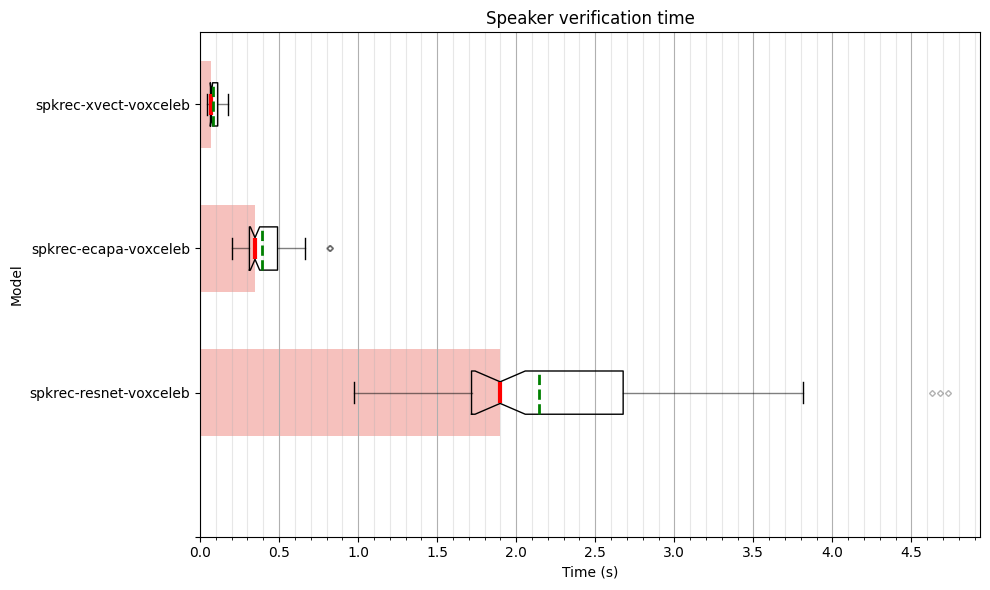

In [38]:

fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figsize as needed

# box plot of transcription time
labels = results['model'].unique().tolist()
# sort the labels by the mean time
labels = [x for _, x in sorted(zip(results.groupby('model')['time'].mean(), labels))]

mytime = [results[results['model'] == model]['time'].values for model in labels]

labels = [''] + labels # Add an empty label to align the bars with the boxplot
y = np.arange(len(labels))

bp = ax.boxplot(mytime, vert=False, notch=True, showmeans=True, meanline=True)

for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
for median in bp['means']:
    median.set(color ='green',
               linewidth = 2)
for whisker in bp['whiskers']:
    whisker.set(alpha = 0.5)
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              markersize = 3,
              color ='#e7298a',
              alpha = 0.3)
# adding bars in the background, from 0 to the median
for i in range(len(labels)-1):
    ax.barh(y[i+1], bp['medians'][i].get_xdata()[0], color='#E33226', alpha=0.3, height=0.6)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Time (s)')
ax.set_ylabel('Model')
ax.set_title('Speaker verification time')
major_ticks = np.arange(0, 10, 0.5)
minor_ticks = np.arange(0, 10, 0.1)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.grid(axis='x')
ax.set_xlim([0, max([max(t) for t in mytime]) + 0.2])
ax.grid(which='minor', alpha=0.3)
fig.tight_layout()
plt.show()

In [69]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=1)
poly_reg = LinearRegression()

def get_poly_x_y(input_x, input_y):
    X = input_x.reshape(-1, 1)
    y = input_y
    X_poly = poly.fit_transform(X)
    poly_reg.fit(X_poly, y)
    # new x values
    x_new = np.linspace(X.min()-1, X.max()+1, 100)
    X_new = x_new.reshape(-1, 1)
    X_new_poly = poly.fit_transform(X_new)
    y_new = poly_reg.predict(X_new_poly)

    slope = poly_reg.coef_[1]

    return x_new, y_new, slope


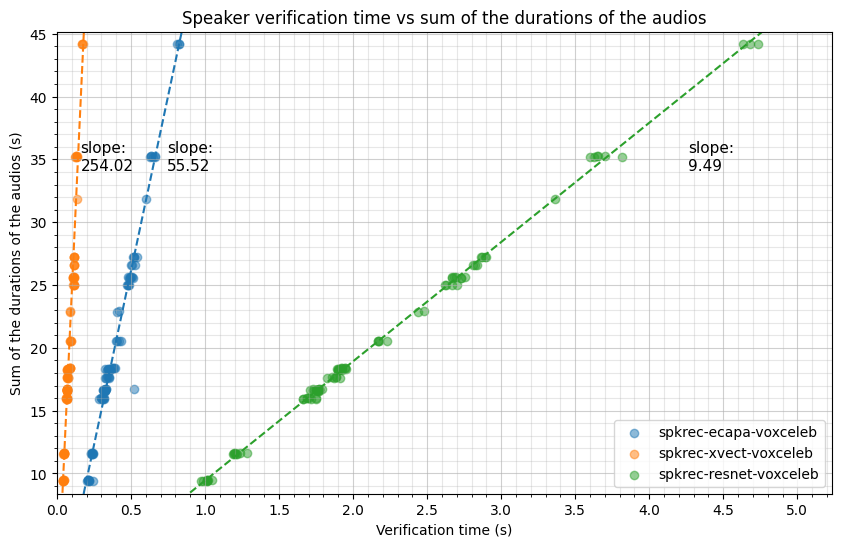

In [91]:
# plot the time taken to verify vs the sum of the durations of the audios
df_plot = results.merge(pd.read_csv("audio_durations.csv"), left_on='audio_to_verify', right_on='audio', how='left').rename(columns={'duration': 'duration_to_verify'}).drop(columns='audio')
df_plot = df_plot.merge(pd.read_csv("audio_durations.csv"), left_on='audio_reference', right_on='audio', how='left').rename(columns={'duration': 'duration_reference'}).drop(columns='audio')

fig, ax = plt.subplots(figsize=(10, 6))

for model in df_plot['model'].unique():
    df_model = df_plot[df_plot['model'] == model]
    ax.scatter(df_model['time'], df_model['duration_to_verify'] + df_model['duration_reference'], label=model, alpha=0.5)
    x_new, y_new, slope = get_poly_x_y(df_model['time'].values, df_model['duration_to_verify'] + df_model['duration_reference'])
    ax.plot(x_new, y_new, linestyle='--')
    coords_text = (max(df_model['time']) - (0.1 * max(df_model['time'])), max(df_model['duration_to_verify'] + df_model['duration_reference']) - 10)
    ax.text(*coords_text, f"slope:\n{slope:.2f}", fontsize=11)
ax.legend()

y_major_ticks = np.arange(0, 101, 5)
y_minor_ticks = np.arange(0, 101, 1)
x_major_ticks = np.arange(0, 11, 0.5)
x_minor_ticks = np.arange(0, 11, 0.1)

ax.set_yticks(y_major_ticks)
ax.set_yticks(y_minor_ticks, minor=True)
ax.set_xticks(x_major_ticks)
ax.set_xticks(x_minor_ticks, minor=True)

ax.grid(which='minor', alpha=0.3)
ax.grid(which='major', alpha=0.6)

# limits
ax.set_ylim([min(df_plot['duration_to_verify'] + df_plot['duration_reference']) - 1, max(df_plot['duration_to_verify'] + df_plot['duration_reference']) + 1])
ax.set_xlim([0, max(df_plot['time']) + 0.5])

ax.set_ylabel('Sum of the durations of the audios (s)')
ax.set_xlabel('Verification time (s)')
ax.set_title('Speaker verification time vs sum of the durations of the audios')
plt.show()

                    model       slope
0   spkrec-xvect-voxceleb  254.023480
0   spkrec-ecapa-voxceleb   55.524290
0  spkrec-resnet-voxceleb    9.493762


C:\Users\echriston\AppData\Local\Temp\ipykernel_4464\896514788.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_slope = pd.concat([df_slope, pd.DataFrame({'model': [model], 'slope': [slope]})])


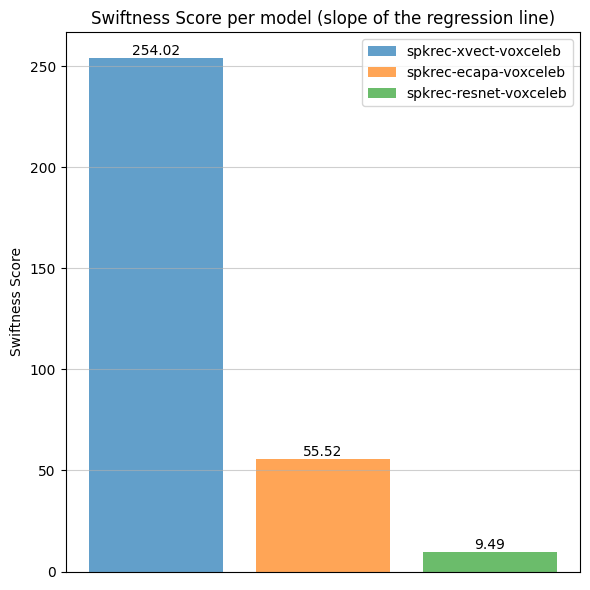

In [95]:
# make the slope a score per model
df_slope = pd.DataFrame(columns=['model', 'slope'])
for model in df_plot['model'].unique():
    df_filtered = df_plot[df_plot['model'] == model]
    _, _, slope = get_poly_x_y(df_filtered['time'].values, df_filtered['duration_to_verify'] + df_filtered['duration_reference'])
    df_slope = pd.concat([df_slope, pd.DataFrame({'model': [model], 'slope': [slope]})])

df_slope = df_slope.sort_values(by='slope', ascending=False)
print(df_slope)

# plot the score per model (bar plot)
fig, ax = plt.subplots(figsize=(6, 6))
for i, row in df_slope.iterrows():
    ax.bar(row['model'], row['slope'], alpha=0.7, label=row['model'])
    ax.text(row['model'], row['slope'] + 0.1, f"{row['slope']:.2f}", ha='center', va='bottom', fontsize=10)
ax.set_ylabel('Swiftness Score')
ax.set_title('Swiftness Score per model (slope of the regression line)')
ax.legend()
# no labels on x-axis
plt.xticks([])
plt.grid(axis='y', alpha=0.6)
plt.tight_layout()
plt.show()